### 1 - 계약일

#### 1-1 계약수

In [ ]:
year_apt_price = pd.DataFrame(df.groupby(['계약연도'])['거래금액_억원'].agg({'count','median'}).round(2)).reset_index()
year_apt_price['전년대비_거래량%'] = year_apt_price['count'].pct_change().round(2) * 100
year_apt_price['전년대비_중위거래금액%'] = year_apt_price['median'].pct_change().round(2) * 100
year_apt_price['상승비'] = year_apt_price['median'].pct_change() + 1
year_apt_price['상승비'] = year_apt_price['상승비'].cumprod().round(3)
year_apt_price['상승비'][0] = 1
year_apt_price

,계약연도,median,count,전년대비_거래량%,전년대비_중위거래금액%,상승비
0,2006,2.70,290572,NaN,NaN,1.000
1,2007,2.70,127507,-56.0,0.0,1.000
2,2008,3.45,125491,-2.0,28.0,1.278
3,2009,3.93,152284,21.0,14.0,1.456
4,2010,3.80,92753,-39.0,-3.0,1.407
5,2011,3.60,114398,23.0,-5.0,1.333
6,2012,3.46,81962,-28.0,-4.0,1.281
7,2013,3.50,139828,71.0,1.0,1.296
8,2014,3.64,179546,28.0,4.0,1.348
9,2015,3.89,255052,42.0,7.0,1.441


In [ ]:
data = year_apt_price

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(x = data['계약연도'], y = data['count'], text = data['count'], textposition = 'outside', name = '거래량'), secondary_y = False)
fig.add_trace(go.Scatter(x = data['계약연도'], y = data['median'], text = data['median'], textposition = 'top center', name = '중위가격', mode='lines+markers+text'), secondary_y = True)

fig.update_yaxes(title_text="<b>거래량</b> (단위 : 건)", secondary_y=False)
fig.update_yaxes(title_text="<b>중위가격</b> (단위 : 억원)", secondary_y=True)
fig.update_layout(template='simple_white', xaxis = dict(dtick = 1), title_text='<b>서울 아파트 거래량과 중위가격 (2006-2021년)</b>')

fig.show()

In [ ]:
data = year_apt_price

fig = px.line(data, x = '계약연도', y = '상승비', text = '상승비')
fig.update_traces(textposition="top center")
fig.update_layout(template='simple_white', xaxis = dict(dtick = 1), title_text="<b>2006년 기준 상승비 (단위: 배)</b>")
fig.show()

#### 1-2 계약월

In [ ]:
month_apt_price = pd.DataFrame(df.groupby(['계약월'])['거래금액_억원'].agg({'median','count'}).reset_index())
month_apt_price['median'] = month_apt_price['median'].round(2)
month_apt_price

,계약월,median,count
0,1,4.10,189356
1,2,3.95,198254
2,3,3.80,243941
3,4,3.87,212582
4,5,4.09,212753
5,6,4.34,235471
6,7,4.37,227163
7,8,4.16,215274
8,9,3.97,217924
9,10,4.05,239367


In [ ]:
data = month_apt_price

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(x = data['계약월'], y = data['count'], text = data['count'], textposition = 'outside', name = '거래량'), secondary_y = False)
fig.add_trace(go.Scatter(x = data['계약월'], y = data['median'], text = data['median'], textposition = 'top center', name = '중위가격', mode='lines+markers+text'), secondary_y = True)

fig.update_yaxes(title_text="<b>거래량</b> (단위 : 건)", secondary_y=False)
fig.update_yaxes(title_text="<b>중위가격</b> (단위 : 억원)", secondary_y=True)
fig.update_layout(template='simple_white', xaxis = dict(dtick = 1), title_text='<b>서울 아파트 월별 거래량과 중위가격</b>')

fig.show()

#### 1-3 계약연도 별 가격 분포

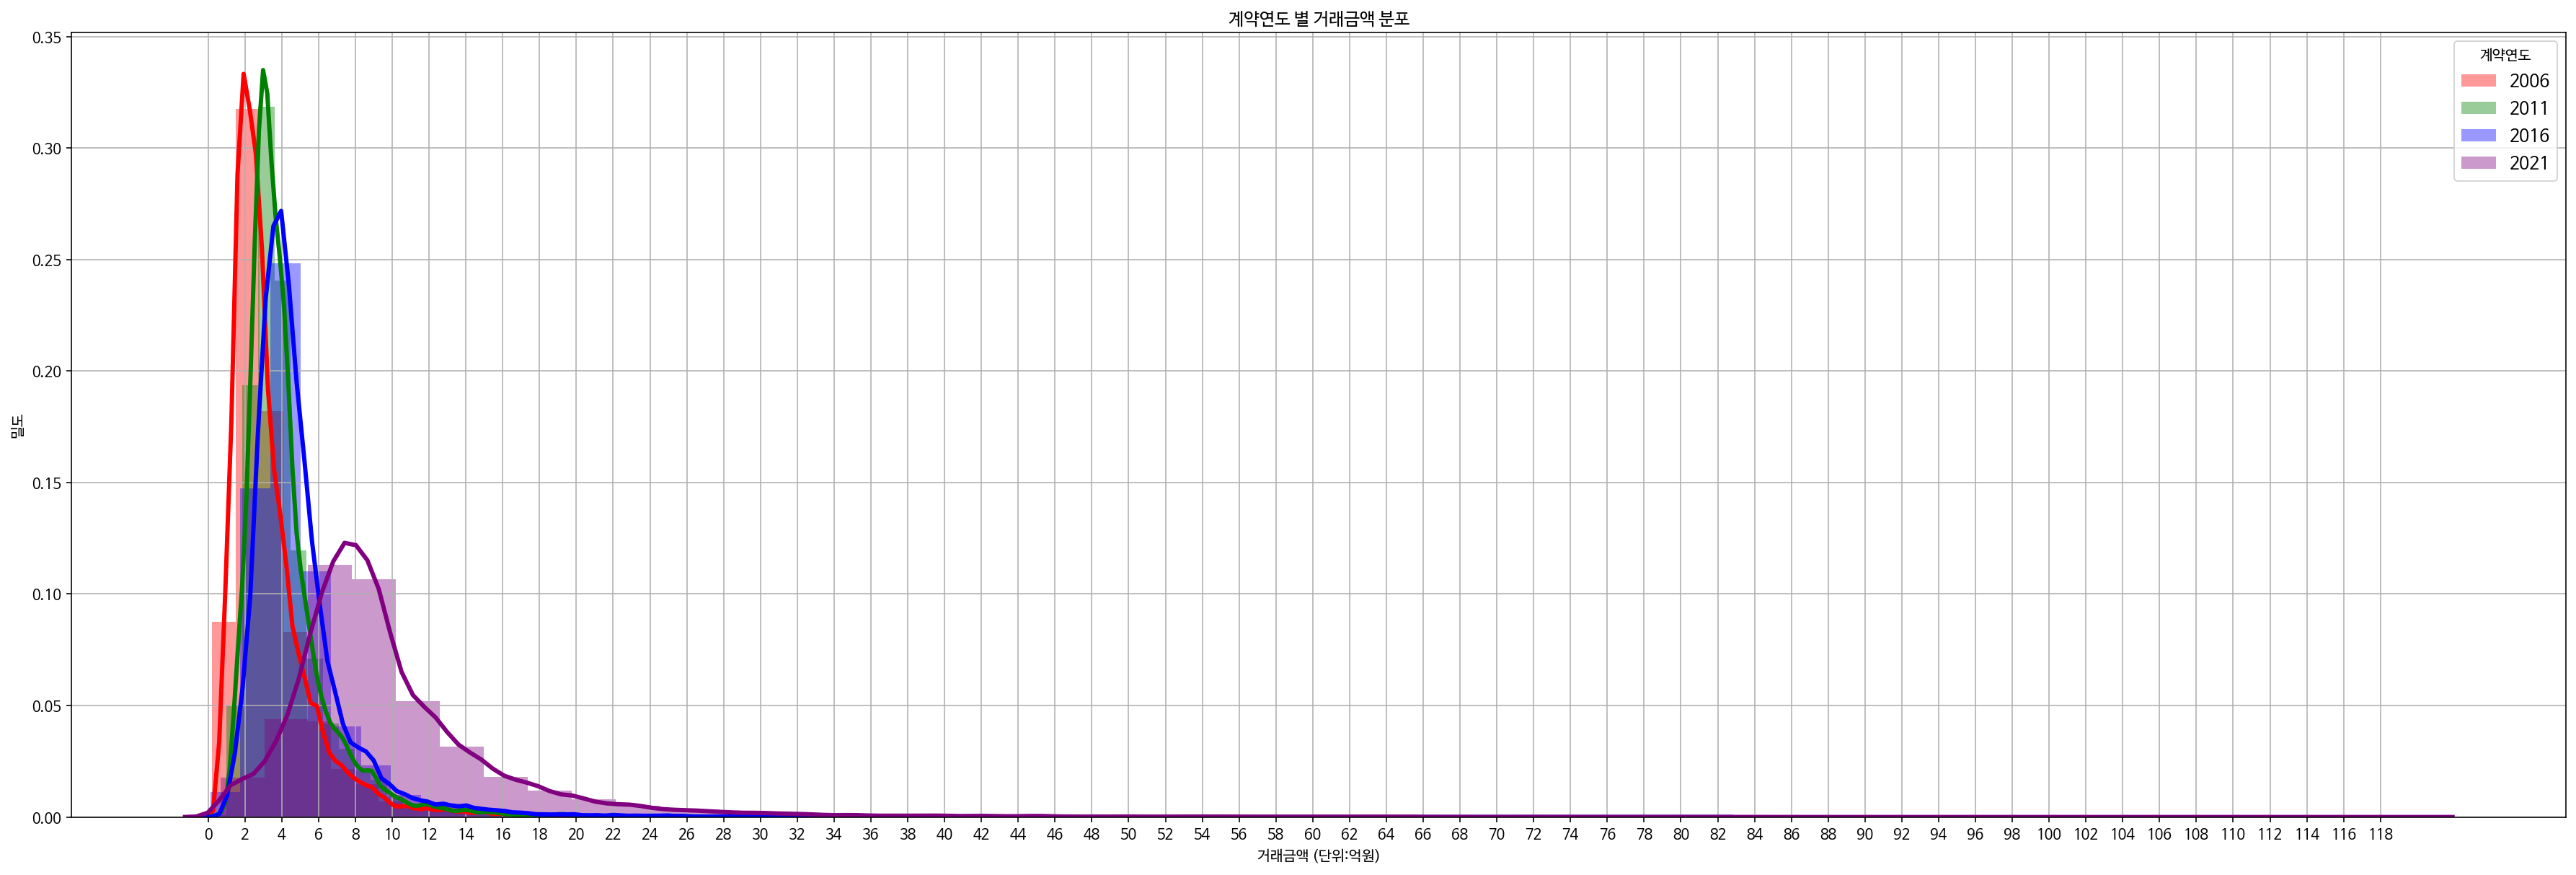

In [ ]:
# 계약연도 별 거래 가격 분포

grp_col_dict = {
  2006:'red'
, 2011:'green'
, 2016:'blue'
, 2021:'purple'}
plt.figure(figsize=(31,10))

for year in grp_col_dict:
  subset = df[df['계약연도'] == year]
  sns.distplot(subset['거래금액_억원'],
               hist = True,  
               kde = True,
               kde_kws = {'linewidth': 3, 'alpha' : 1},
               color = grp_col_dict[year],
               label = year)

plt.title('계약연도 별 거래금액 분포')
plt.xlabel('거래금액 (단위:억원)')
plt.ylabel('밀도')
plt.legend(prop={'size': 12}, title = '계약연도')
plt.xticks(np.arange(0,120, 2))
plt.show()

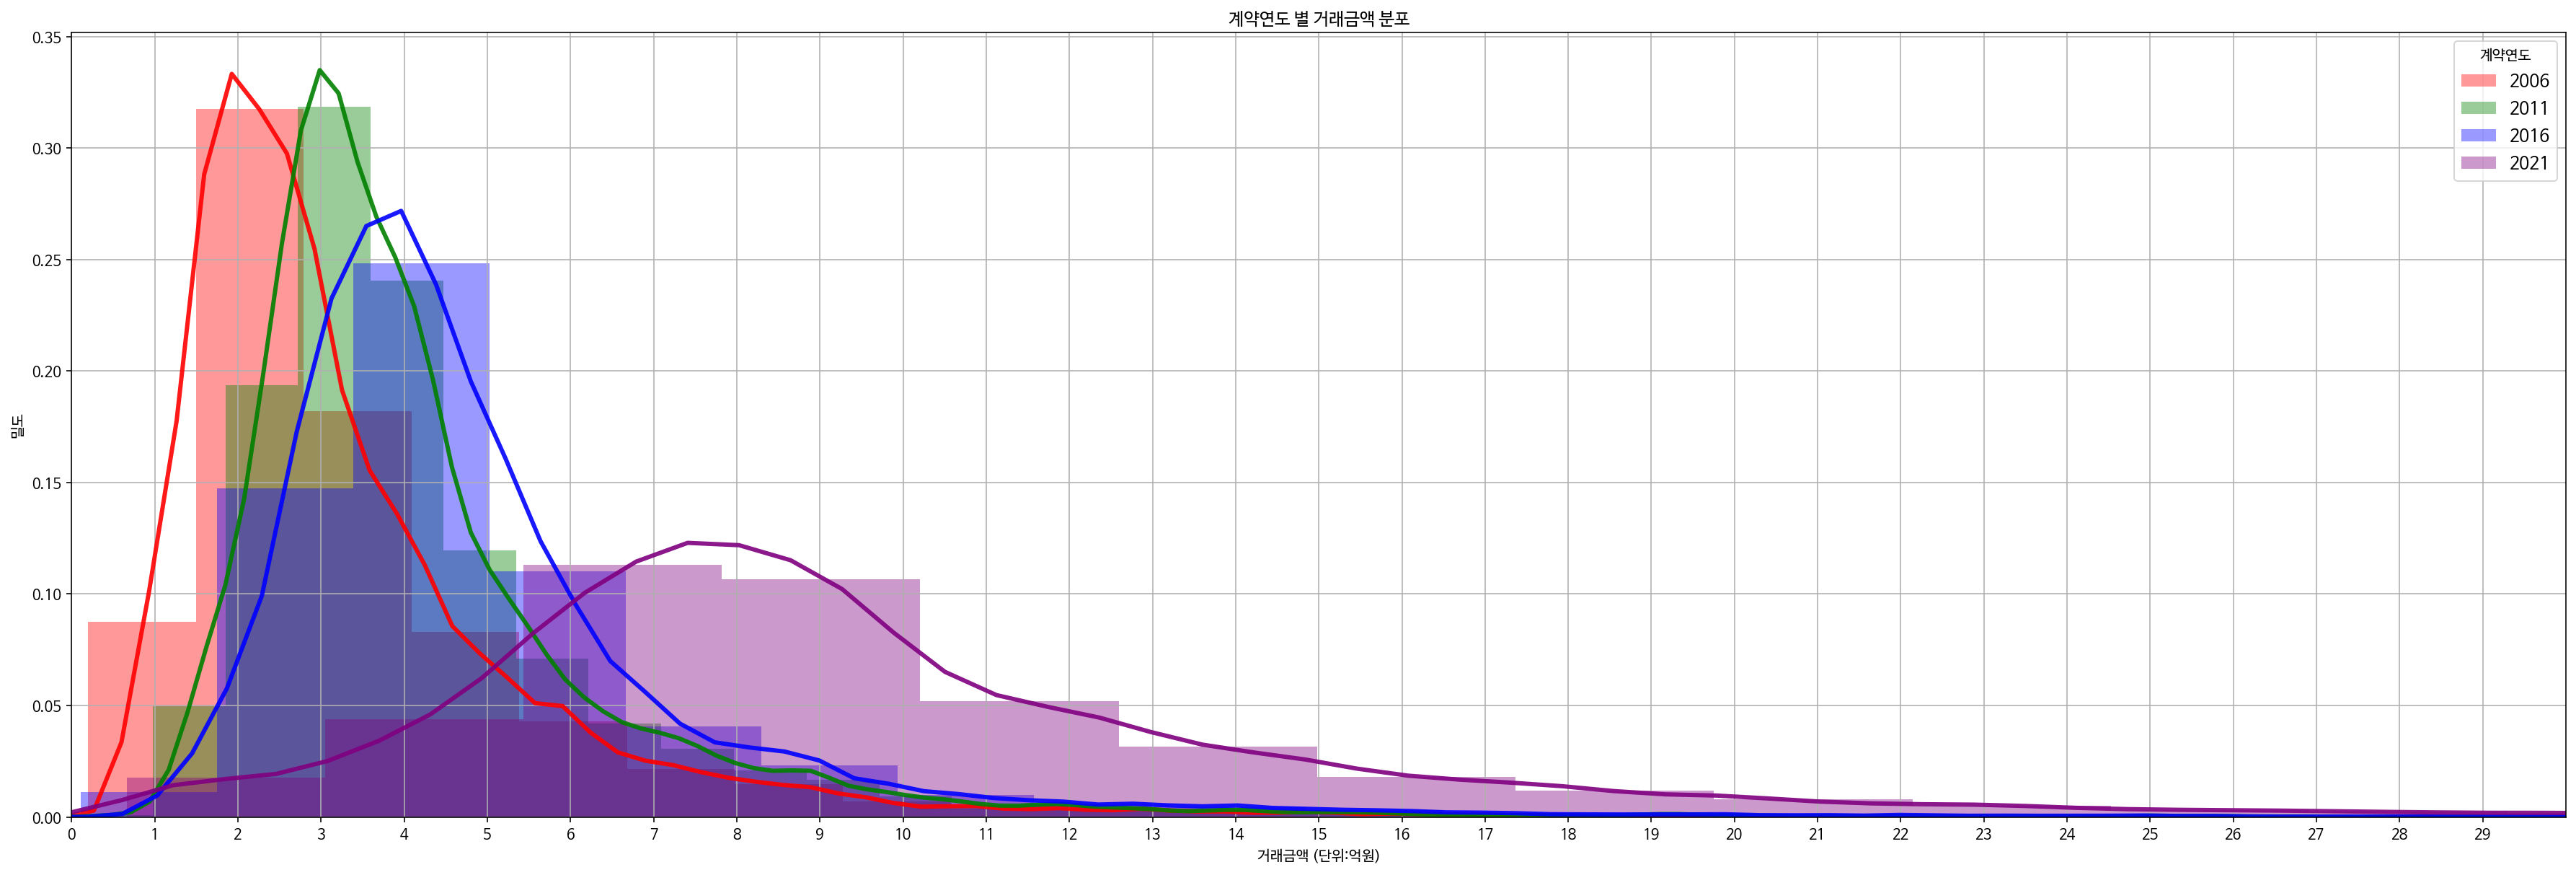

In [ ]:
# 계약연도 별 거래 가격 분포 (거래금액 30억 이내로 확대)

grp_col_dict = {
  2006:'red'
, 2011:'green'
, 2016:'blue'
, 2021:'purple'}
plt.figure(figsize=(31,10))

for year in grp_col_dict:
  subset = df[df['계약연도'] == year]
  sns.distplot(subset['거래금액_억원'],
               hist = True,  
               kde = True,
               kde_kws = {'linewidth': 3, 'alpha' : 0.9},
               color = grp_col_dict[year],
               label = year)


plt.title('계약연도 별 거래금액 분포')
plt.xlabel('거래금액 (단위:억원)')
plt.ylabel('밀도')
plt.legend(prop={'size': 12}, title = '계약연도')
plt.xlim([0,30])
plt.xticks(np.arange(0,30, 1))
plt.show()

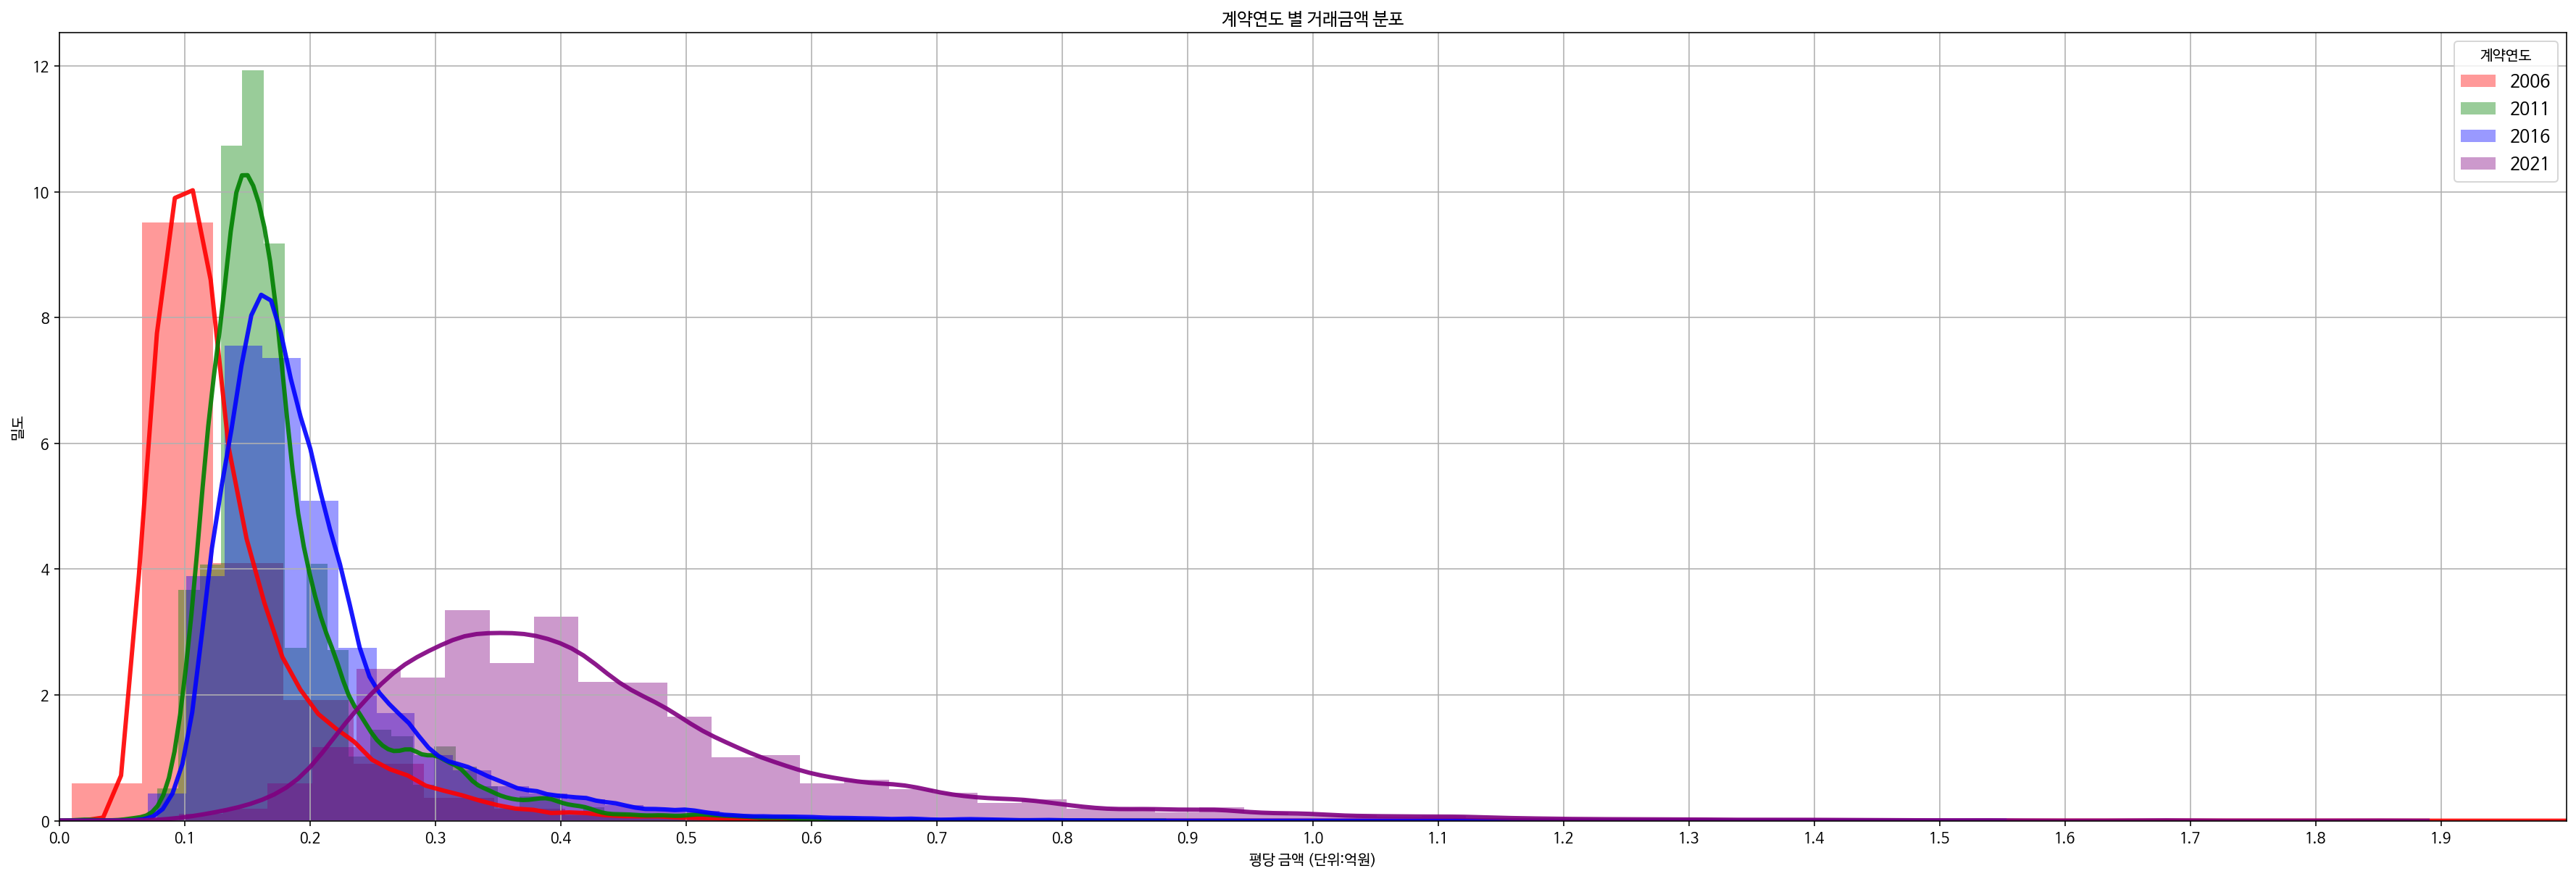

In [ ]:
# 계약연도 별 평당 가격 분포

grp_col_dict = {
  2006:'red'
, 2011:'green'
, 2016:'blue'
, 2021:'purple'}
plt.figure(figsize=(31,10))

for year in grp_col_dict:
  subset = df[df['계약연도'] == year]
  sns.distplot(subset['평당금액_억원'],
               hist = True,  
               kde = True,
               kde_kws = {'linewidth': 3, 'alpha' : 0.9},
               color = grp_col_dict[year],
               label = year)

plt.title('계약연도 별 거래금액 분포')
plt.xlabel('평당 금액 (단위:억원)')
plt.ylabel('밀도')
plt.legend(prop={'size': 12}, title = '계약연도')
plt.xlim([0,2])
plt.xticks(np.arange(0,2, 0.1))

plt.show()

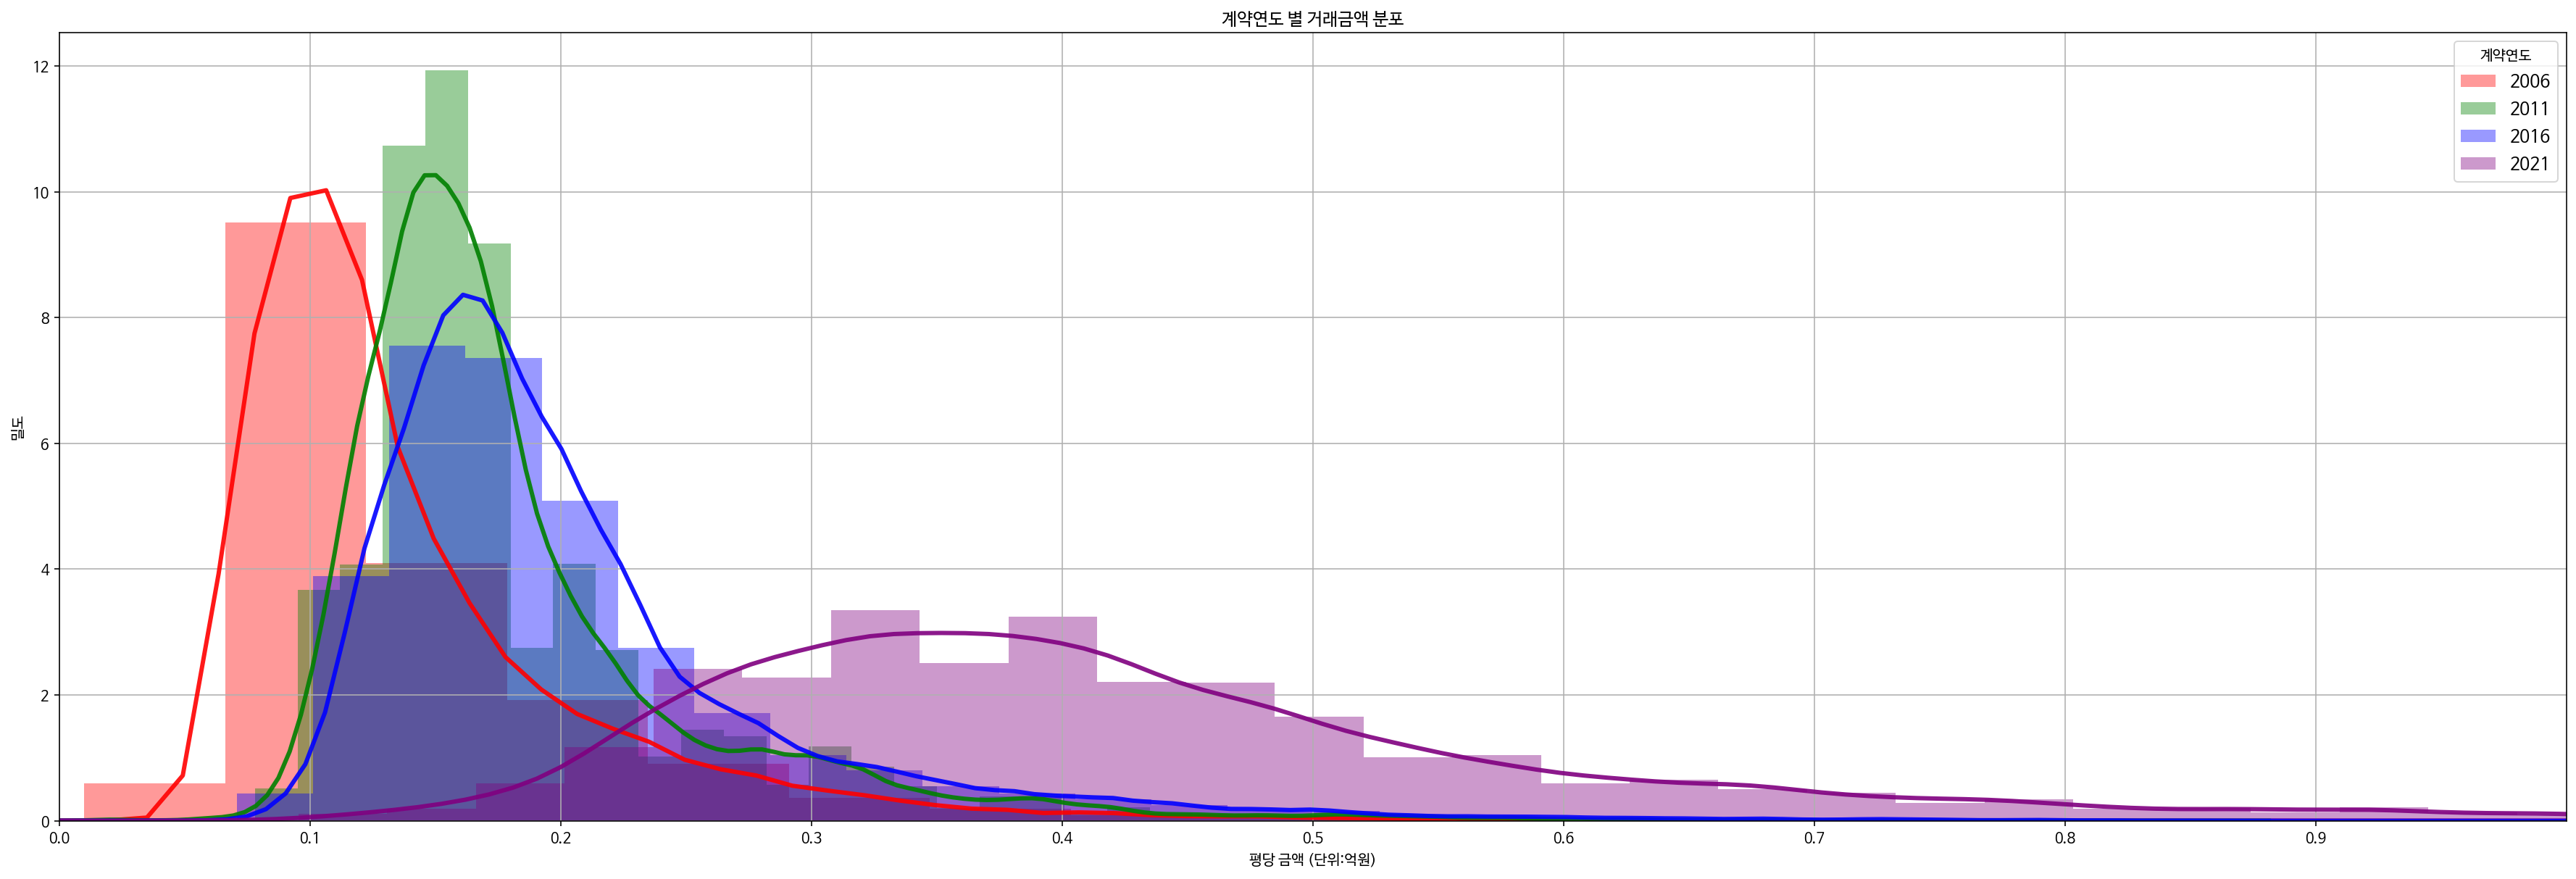

In [ ]:
# 계약연도 별 평당 가격 분포

grp_col_dict = {
  2006:'red'
, 2011:'green'
, 2016:'blue'
, 2021:'purple'}
plt.figure(figsize=(31,10))

for year in grp_col_dict:
  subset = df[df['계약연도'] == year]
  sns.distplot(subset['평당금액_억원'],
               hist = True,  
               kde = True,
               kde_kws = {'linewidth': 3, 'alpha' : 0.9},
               color = grp_col_dict[year],
               label = year)

plt.title('계약연도 별 거래금액 분포')
plt.xlabel('평당 금액 (단위:억원)')
plt.ylabel('밀도')
plt.legend(prop={'size': 12}, title = '계약연도')
plt.xlim([0,1])
plt.xticks(np.arange(0,1, 0.1))

plt.show()